#### Importing the libraries

In [95]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import math as m
from sklearn import linear_model
import warnings
warnings.filterwarnings("ignore")


#### Splitting data into train and test

In [106]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [108]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

#### Intializing initial parameters

In [109]:
w = np.zeros_like(X_train[0])# initial weight vector
b = 0      # initial intercept value
eta0  = 0.0001  # learning rate
alpha = 0.0001 # lambda value
N = len(X_train)

In [110]:
def sigmoid(w,x,b):
    return 1/(1+np.exp(-(np.dot(x,w.T)+b))) #return 1/1+e(-x)

In [111]:
def logloss(w,x,y,b,reg=0):
    val=sigmoid(w,x,b)
    return -np.mean(y*np.log10(val)+(1-y)*np.log10(1-val))+reg  # cost function of logistic regression

In [112]:
print("INITIAL LOG LOSS:")
logloss(w,X_train,y_train,b)

INITIAL LOG LOSS:


0.3010299956639812

#### SGD Alorithm

In [113]:
def sgd_algo(x_train,y_train,x_test,y_test,eta0,alpha,w,b,epoch):
    train_loss=[]
    test_loss=[]
    epoc=[]
    for i in  range(0,epoch): 
        epoc.append(i)
        for j in range(0,N):
            reg=alpha/2*np.dot(w.T,w) #regulrization term
            w = ((1-eta0*(alpha/N))*w)+((eta0*x_train[j])*(y_train[j]-sigmoid(w,x_train[j],b))) # updating weight vector
            b = b+(eta0*(y_train[j]-sigmoid(w,x_train[j],b)))       # updatind intercept    
        train=logloss(w,x_train,y_train,b,reg)
        train_loss.append(train)    # calculating train and test loss for updated w,b on each epoch
        test=logloss(w,x_test,y_test,b,reg)
        test_loss.append(test)
        """ 
       if i==0 :
            continue                                              # block to check covergence
        else:                                                     # but checking not getting optimium value as sklearn implementation
            if abs(train_loss[i]-train_loss[i-1])>.001:
                continue
            else:
                break"""
    return w,b ,train_loss,test_loss,epoc

In [114]:
epoch=6
w,b,tr,te,epoc=sgd_algo(X_train,y_train,X_test,y_test,eta0, alpha,w,b,epoch)

In [115]:
print("optimal weight vector:")
print("\n")
print(w)

optimal weight vector:


[-0.40819512  0.18608803 -0.13873193  0.33720386 -0.19058573  0.55321631
 -0.44625706 -0.09550674  0.20929646  0.16027648  0.18715532  0.00822064
 -0.0701101   0.33795986  0.0206259 ]


In [116]:
print("optimal intercept value:")
print("\n")
print(b)

optimal intercept value:


-0.7613483856830058


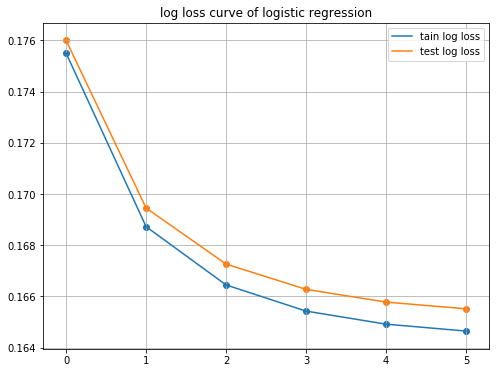

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.grid()
plt.plot(epoc,tr, label='tain log loss')
plt.plot(epoc,te, label='test log loss')
plt.scatter(epoc,tr)
plt.scatter(epoc,te)
plt.title('log loss curve of logistic regression')
plt.legend()

#### sklearn implementation

In [97]:
clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=.001, verbose=2, learning_rate='constant')
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.04 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.08 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.11 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.13 seconds.
Convergence after 6 epochs took 0.13 seconds


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=15, shuffle=True,
       tol=0.001, verbose=2, warm_start=False)

In [100]:
clf.coef_

array([[-0.41177431,  0.18416782, -0.13895073,  0.33572511, -0.18423237,
         0.5494352 , -0.45213692, -0.08857465,  0.21536661,  0.17351757,
         0.18480827,  0.00443463, -0.07033001,  0.33683181,  0.02004129]])

In [99]:
clf.coef_-w

array([[-0.0035792 , -0.00192022, -0.0002188 , -0.00147875,  0.00635336,
        -0.0037811 , -0.00587986,  0.00693208,  0.00607015,  0.0132411 ,
        -0.00234705, -0.00378601, -0.00021991, -0.00112805, -0.00058462]])

*  differnce between sklearn and custom implementation is almost  in terms of 10^-3

In [123]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        if sigmoid(w, X[i], b) >= 0.5: 
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print("train accuracy :")
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print("test accuracy :")
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

train accuracy :
0.9617866666666667
test accuracy :
0.95952
